In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading sales_data1 csv file
df_sales = pd.read_csv('sales_data_1.csv')
df_sales.head(5)

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [3]:
#checking datatypes
df_sales.dtypes

Date                 object
Firm bought from     object
Buying price        float64
Customer             object
Selling price       float64
Quantity sold         int64
dtype: object

In [4]:
#checking for missing values
df_sales.isnull().sum()

Date                0
Firm bought from    0
Buying price        0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

In [5]:
#creating columns for COGS, revenue, profit, gross margin based on formula
df_sales['COGS'] = df_sales['Buying price'] * df_sales['Quantity sold']
df_sales['revenue'] = df_sales['Selling price'] * df_sales['Quantity sold']
df_sales['profit'] = df_sales['revenue'] - df_sales['COGS']
df_sales['Gross margin %'] = round((df_sales['profit']/df_sales['revenue']) * 100,2)
df_sales

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,COGS,revenue,profit,Gross margin %
0,21/08/23,Vendor6,72.11,Customer7,91.58,44,3172.84,4029.52,856.68,21.26
1,21/08/23,Vendor4,75.08,Customer7,83.71,17,1276.36,1423.07,146.71,10.31
2,21/08/23,Vendor7,83.93,Customer2,103.76,15,1258.95,1556.40,297.45,19.11
3,21/08/23,Vendor7,52.01,Customer3,64.53,7,364.07,451.71,87.64,19.40
4,21/08/23,Vendor2,98.91,Customer5,140.92,1,98.91,140.92,42.01,29.81
...,...,...,...,...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18,1166.76,1574.10,407.34,25.88
66,27/08/23,Vendor8,88.79,Customer3,105.59,5,443.95,527.95,84.00,15.91
67,27/08/23,Vendor5,63.30,Customer5,92.92,32,2025.60,2973.44,947.84,31.88
68,27/08/23,Vendor5,94.06,Customer5,125.67,4,376.24,502.68,126.44,25.15


In [6]:
#overall gross margin = total profit/ total revenue * 100
overall_gross_margin = df_sales['profit'].sum()/df_sales['revenue'].sum()*100
print("Overall Gross Margin is", round(overall_gross_margin,2),'%')


Overall Gross Margin is 24.63 %


In [7]:
#group by vendors to find profit acquired based on each vendors
profitable_vendor = df_sales.groupby('Firm bought from')['profit'].sum()
profitable_vendor

Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: profit, dtype: float64

In [8]:
#most profitable vendor
most_profitable_vendor = profitable_vendor[profitable_vendor == profitable_vendor.max()]
print("Most Profitable Vendor:", most_profitable_vendor)

Most Profitable Vendor: Firm bought from
Vendor4    6903.31
Name: profit, dtype: float64


In [9]:
#group by customers to find profit acquired based on each customers
profitable_customer = df_sales.groupby('Customer')['profit'].sum()
profitable_customer

Customer
Customer1     5310.57
Customer10    3692.44
Customer2     4215.67
Customer3     1055.05
Customer4     3337.37
Customer5     1315.28
Customer6     1930.76
Customer7     2197.62
Customer8     6498.91
Customer9     1929.08
Name: profit, dtype: float64

In [10]:
#least profitable customer
least_profitable_customer = profitable_customer[profitable_customer == profitable_customer.min()]
print("Least Profitable Customer:", least_profitable_customer)

Least Profitable Customer: Customer
Customer3    1055.05
Name: profit, dtype: float64


In [11]:
#converting date column of object data type to date data type
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Day of week'] = df_sales['Date'].dt.day_name()
df_sales

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,COGS,revenue,profit,Gross margin %,Day of week
0,2023-08-21,Vendor6,72.11,Customer7,91.58,44,3172.84,4029.52,856.68,21.26,Monday
1,2023-08-21,Vendor4,75.08,Customer7,83.71,17,1276.36,1423.07,146.71,10.31,Monday
2,2023-08-21,Vendor7,83.93,Customer2,103.76,15,1258.95,1556.40,297.45,19.11,Monday
3,2023-08-21,Vendor7,52.01,Customer3,64.53,7,364.07,451.71,87.64,19.40,Monday
4,2023-08-21,Vendor2,98.91,Customer5,140.92,1,98.91,140.92,42.01,29.81,Monday
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,Customer6,87.45,18,1166.76,1574.10,407.34,25.88,Sunday
66,2023-08-27,Vendor8,88.79,Customer3,105.59,5,443.95,527.95,84.00,15.91,Sunday
67,2023-08-27,Vendor5,63.30,Customer5,92.92,32,2025.60,2973.44,947.84,31.88,Sunday
68,2023-08-27,Vendor5,94.06,Customer5,125.67,4,376.24,502.68,126.44,25.15,Sunday


In [12]:
#group by day of week to find profit acquired based on each day of week
profitable_day = df_sales.groupby('Day of week')['profit'].sum()
profitable_day

Day of week
Friday       3761.94
Monday       6847.34
Saturday     5223.16
Sunday       3086.46
Thursday     4866.03
Tuesday      3305.35
Wednesday    4392.47
Name: profit, dtype: float64

In [13]:
#most profitable day of week
most_profitable_day = profitable_day[profitable_day == profitable_day.max()]
print("Most Profitable Day of Week:", most_profitable_day)

Most Profitable Day of Week: Day of week
Monday    6847.34
Name: profit, dtype: float64


In [14]:
#least profitable day of week
least_profitable_day = profitable_day[profitable_day == profitable_day.min()]
print("Least Profitable Day of Week:", least_profitable_day)

Least Profitable Day of Week: Day of week
Sunday    3086.46
Name: profit, dtype: float64


In [2]:
#reading sales_data2 csv 
df_sales2=pd.read_csv('sales_data_2.csv')
df_sales2.head(5)

NameError: name 'pd' is not defined

In [3]:
df_sales2['COGS'] = df_sales2['Buying price'] * df_sales2['Quantity sold']
df_sales2['revenue'] = df_sales2['Selling price'] * df_sales2['Quantity sold']
df_sales2['profit'] = df_sales2['revenue'] - df_sales2['COGS']
df_sales2['Gross margin %'] = round((df_sales2['profit']/df_sales2['revenue']) * 100,2)
df_sales2

NameError: name 'df_sales2' is not defined

In [17]:
# Convert the 'Date' column to a datetime type
df_sales2['Date'] = pd.to_datetime(df_sales2['Date'], format='%Y-%m-%d')
df_sales2['Date']
# Group the data by date and aggregate daily gross profit
df_salesg = df_sales2.groupby('Date')['profit'].sum().reset_index()

In [18]:
#calculating 3 day avaerage using rolling window
df_salesg['3-Day Avg Gross Profit'] = df_salesg['profit'].rolling(window=3).mean()
df_salesg[['Date', '3-Day Avg Gross Profit']]

,Date,3-Day Avg Gross Profit
0,2023-08-21,NaN
1,2023-08-22,NaN
2,2023-08-23,4848.386667
3,2023-08-24,4187.950000
4,2023-08-25,4340.146667
5,2023-08-26,4617.043333
6,2023-08-27,4023.853333


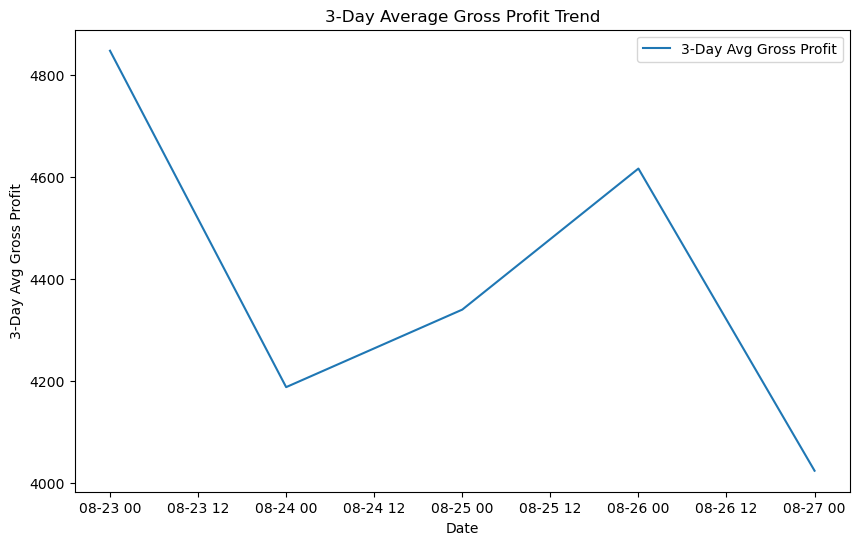

In [19]:
# Plotting the 3-day average gross profit trend
plt.figure(figsize=(10, 6))
plt.plot(df_salesg['Date'], df_salesg['3-Day Avg Gross Profit'], label='3-Day Avg Gross Profit')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.title('3-Day Average Gross Profit Trend')
plt.legend()
plt.show()

In [20]:
total_quantity_sold = df_sales2['Quantity sold'].sum()
total_quantity_sold

1697

In [21]:
total_quantity_bought = df_sales2['Quantity bought'].sum()
total_quantity_bought

3561

In [22]:
buying_price_percentiles = df_sales2['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = df_sales2['Selling price'].quantile([0.25, 0.5, 0.75])

print("Buying Price Percentiles:")
print(buying_price_percentiles)

print("Selling Price Percentiles:")
print(selling_price_percentiles)

Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64
Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


In [23]:
above_75th_buying = df_sales2[df_sales2['Buying price'] >= buying_price_percentiles[0.75]]

In [24]:
above_75th_buying

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,COGS,revenue,profit,Gross margin %
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,1258.95,1556.40,297.45,19.11
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,98.91,140.92,42.01,29.81
7,2023-08-21,Vendor3,98.11,62,Customer2,146.76,62,6082.82,9099.12,3016.30,33.15
9,2023-08-21,Vendor5,88.45,39,Customer7,102.31,23,2034.35,2353.13,318.78,13.55
14,2023-08-22,Vendor9,80.15,34,Customer9,109.71,20,1603.00,2194.20,591.20,26.94
15,2023-08-22,Vendor9,92.70,23,Customer8,132.53,9,834.30,1192.77,358.47,30.05
16,2023-08-22,Vendor7,89.79,61,Customer1,111.92,25,2244.75,2798.00,553.25,19.77
27,2023-08-23,Vendor10,93.29,68,Customer8,135.33,41,3824.89,5548.53,1723.64,31.06
34,2023-08-24,Vendor4,99.23,95,Customer1,131.98,92,9129.16,12142.16,3013.00,24.81
35,2023-08-24,Vendor7,93.63,94,Customer7,119.13,23,2153.49,2739.99,586.50,21.41


In [25]:
len(above_75th_buying)

18

In [26]:
below_25th_selling = df_sales2[df_sales2['Selling price'] <= selling_price_percentiles[0.25]]
below_25th_selling

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,COGS,revenue,profit,Gross margin %
8,2023-08-21,Vendor1,20.95,95,Customer3,24.48,22,460.90,538.56,77.66,14.42
10,2023-08-22,Vendor5,27.71,33,Customer2,32.90,11,304.81,361.90,57.09,15.78
11,2023-08-22,Vendor10,10.48,80,Customer3,14.31,40,419.20,572.40,153.20,26.76
24,2023-08-23,Vendor7,27.75,22,Customer1,30.86,3,83.25,92.58,9.33,10.08
25,2023-08-23,Vendor10,10.19,42,Customer8,11.65,25,254.75,291.25,36.50,12.53
31,2023-08-24,Vendor6,14.76,19,Customer2,16.25,3,44.28,48.75,4.47,9.17
32,2023-08-24,Vendor7,26.29,55,Customer10,38.53,55,1445.95,2119.15,673.20,31.77
33,2023-08-24,Vendor5,18.66,68,Customer5,22.45,11,205.26,246.95,41.69,16.88
36,2023-08-24,Vendor7,24.75,20,Customer8,31.49,19,470.25,598.31,128.06,21.40
37,2023-08-24,Vendor2,17.24,52,Customer5,19.39,42,724.08,814.38,90.30,11.09


In [27]:
len(below_25th_selling)

18

In [28]:
#group by vendors to find gross margin acquired based on each vendors
grossmargin_vendor = df_sales.groupby('Firm bought from')['Gross margin %'].mean()
grossmargin_vendor

Firm bought from
Vendor1     20.506000
Vendor10    20.638333
Vendor2     21.465455
Vendor3     25.116667
Vendor4     21.053333
Vendor5     20.698571
Vendor6     18.580000
Vendor7     21.529286
Vendor8     17.320000
Vendor9     27.040000
Name: Gross margin %, dtype: float64

In [1]:
#most profitable vendor based on gross margin
most_profitable_vendor = grossmargin_vendor[grossmargin_vendor == grossmargin_vendor.max()]
print("Vendor to have a tie up:", most_profitable_vendor)

NameError: name 'grossmargin_vendor' is not defined